<a href="https://colab.research.google.com/github/AhmadRizkiadi/my_forum_dApp/blob/main/Artificial_Neural_Network_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Network_Regresi**

**Ahmad Rizkiadi Budi Wirawan**

TI-2B / 4.33.23.1.01

**IMPORT LIBRARIES**

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist


In [64]:
df = pd.read_csv('concrete_data.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [65]:
df.shape

(1030, 9)

In [66]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [67]:
print(df.dropna(axis=1,how="all"))

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28    

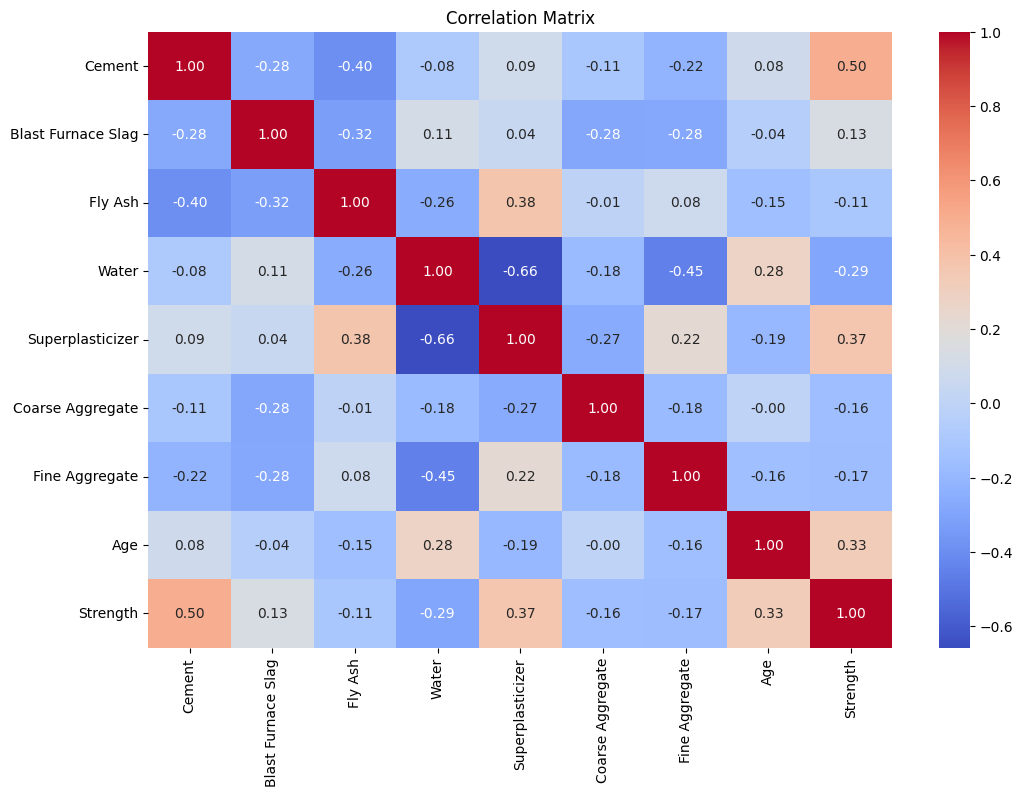

In [68]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [69]:
correlation_threshold = 0.3
correlations = correlation_matrix['Strength']
selected_features = correlations[abs(correlations) > correlation_threshold].index.tolist()
# Ensure the target is not included in the features
selected_features.remove('Strength')
print("\n--- Selected Features Based on Correlation ---")
print(selected_features)



--- Selected Features Based on Correlation ---
['Cement', 'Superplasticizer', 'Age']


**SPLIT DATASET**

In [70]:
# num_test = 10

from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
scaler = preprocessing.StandardScaler()

# Select features before splitting
X = df[selected_features].values
y = df['Strength'].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)  # shuffle=False to use the last num_test for testing

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# y_train and y_test are already in the correct shape

In [71]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000

model = MLPRegressor(random_state=1, max_iter=n_iter, hidden_layer_sizes=n_hidden, learning_rate_init=learning_rate)

In [72]:
model.fit(X_train, y_train.ravel())

MLPRegressor(hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2000,
             random_state=1)

In [73]:
predictions = model.predict(X_test)
print(predictions)
print(y_test)

[34.49089477 42.43440297 36.2246813  45.17658928 60.42693021 42.98823165
 46.98307677 36.27077682 35.0208345  45.10369111 61.36446214 44.63539454
 41.7849018  48.36133178 41.63770403 32.35689446 47.00666728 46.62192358
 38.09776661 36.82588326 41.32320937 41.9030121  47.74574187 43.52077251
 40.1935805  38.65000735 37.31962897 37.4805011  41.32320937 42.86218415
 44.05331336 47.04782884 51.73632752 30.54389968 45.55001562 39.5782054
 47.31446223 49.04312166 31.83406003 41.74374024 47.28422046 38.78852776
 38.44891719 39.65864147 43.21646345 47.93005214 32.19602233 37.44028307
 42.07530447 36.65836434 44.85747697 35.34257877 29.17011998 47.13206593
 28.64728555 44.85747697 34.25350859 34.29372662 32.80247611 39.10370457
 46.2393464  34.29372662 42.28151294 49.42786536 34.29372662 37.36326738
 37.40006504 42.45712416 45.38228883 33.16443841 33.89154629 43.1962558
 47.23751349 41.43594529 40.67720667 36.89841382 38.07358976 33.93176432
 46.24255427 35.34257877 35.34257877 35.60235361 43.6

# **MLP Regressor**


Mean Squared Error: 79.21
R-squared: 0.69


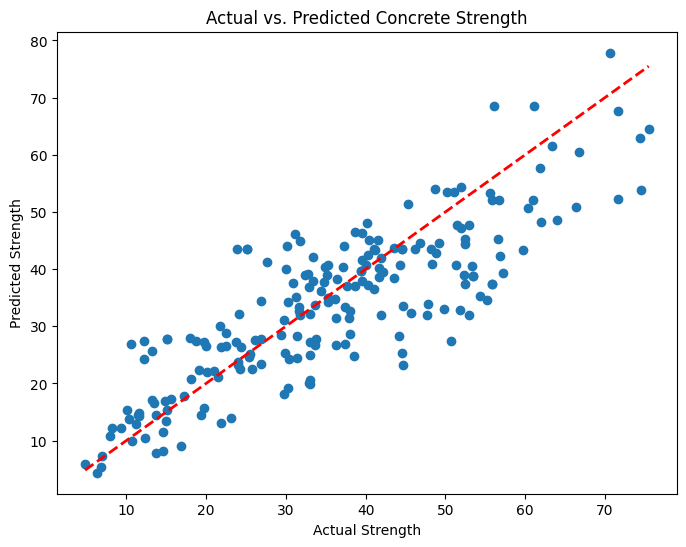

In [74]:
# Data Preprocessing
X = df[selected_features]
y = df['Strength']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training (MLPRegressor)
model = MLPRegressor(hidden_layer_sizes=(20,),
                     max_iter=2000,
                     learning_rate_init=0.1,
                     random_state=42)

model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualization (example: predicted vs. actual)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs. Predicted Concrete Strength")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()


# **GRNN**

Mean Squared Error: 90.39994032666998
R-squared: 0.6491732774486839


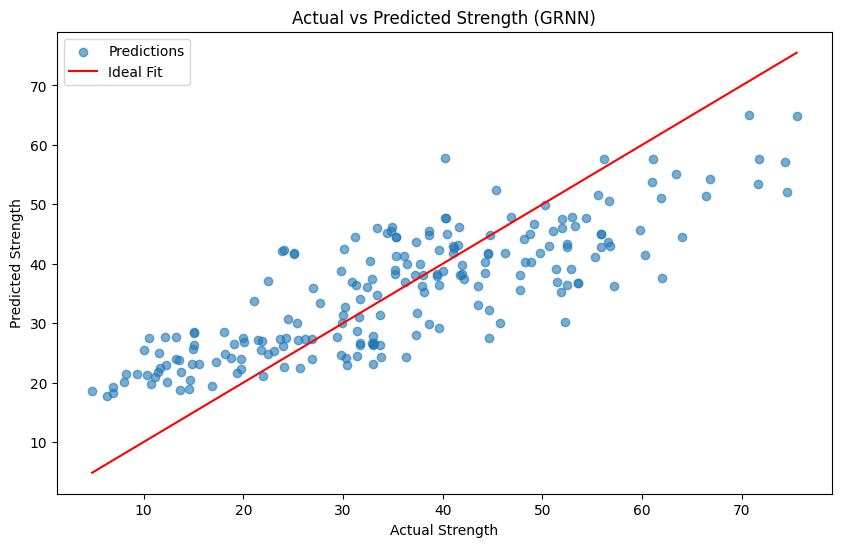

In [75]:
# Prepare the data
X = df[selected_features].values
y = df['Strength'].values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define GRNN Prediction Function
def grnn_predict(X_train, y_train, X_test, sigma=0.5):
    predictions = []
    for test_point in X_test:
        distances = cdist(X_train, test_point.reshape(1, -1), metric='euclidean')
        weights = np.exp(- (distances ** 2) / (2 * sigma ** 2))
        weighted_sum = np.sum(weights * y_train) / np.sum(weights)
        predictions.append(weighted_sum)
    return np.array(predictions)

# Make predictions
sigma = 0.5
predictions = grnn_predict(X_train, y_train, X_test, sigma)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Fit")
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength (GRNN)')
plt.legend()
plt.show()
